### 라이브러리 불러오기

In [3]:
# 기본 Libaray
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
sns.set()
%matplotlib inline

# 전처리 Libaray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
# 그래프 한글 깨짐현상 해결방안
# 폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 랜덤 포레스트

In [5]:
# 랜덤포레스트 라이브러리 부르기
from sklearn.ensemble import RandomForestClassifier

In [6]:
# 임의의 데이터 부르기
df = pd.read_csv('./iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
# 전처리
df['variety'] = df['variety'].map({"Setosa":1, "Versicolor":2, "Virginica":2})

In [8]:
# 독립, 종속 나누기
X = df.iloc[:,[0,1,2,3]]
y = df['variety']

In [9]:
# 훈련용 / 검증용 데이터 분할
def Split_data(X,y,k): # X : 독립변수, y : 종속변수, k : test_size의 크기(0~1 사이값)
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=k, random_state=0)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = Split_data(X,y,0.3)

In [10]:
# 랜덤포레스트 모델

## 추후 파라미터 설정이 유동적으로 가능할 경우 변경이 필요한 파라미터는 따로 주석에 메모함
### 메모 사항 이외에는 default 값으로 고정 (*추후 변경될 수 있음)
def RF_Model(x_train,x_test,y_train,y_test):
    ### 기본으로 default되어 있는 값
    rf = RandomForestClassifier( 
        n_estimators=100, # 변경할 수 있도록 수정 (intefer)
        criterion='gini', # 변경할 수 있도록 수정 ('gini','entropy')
        max_depth=None, # 변경할 수 있도록 수정 (integer)
        min_samples_split=2, # 변경할 수 있도록 수정 (integer)
        min_samples_leaf=1, # 변경할 수 있도록 수정 (integer)
        min_weight_fraction_leaf=0.0,
        max_features='auto', # 변경할 수 있도록 수정 ('auto','sqrt','log2')
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=None,
        random_state=None, # random_state = 0로 변경
        verbose=0,
        warm_start=False,
        class_weight=None,
        ccp_alpha=0.0,
        max_samples=None
    )
    rf.fit(x_train,y_train)
    rf_pred = rf.predict(x_test)
    return rf, rf_pred

In [11]:
rf, rf_pred = RF_Model(x_train,x_test,y_train,y_test)

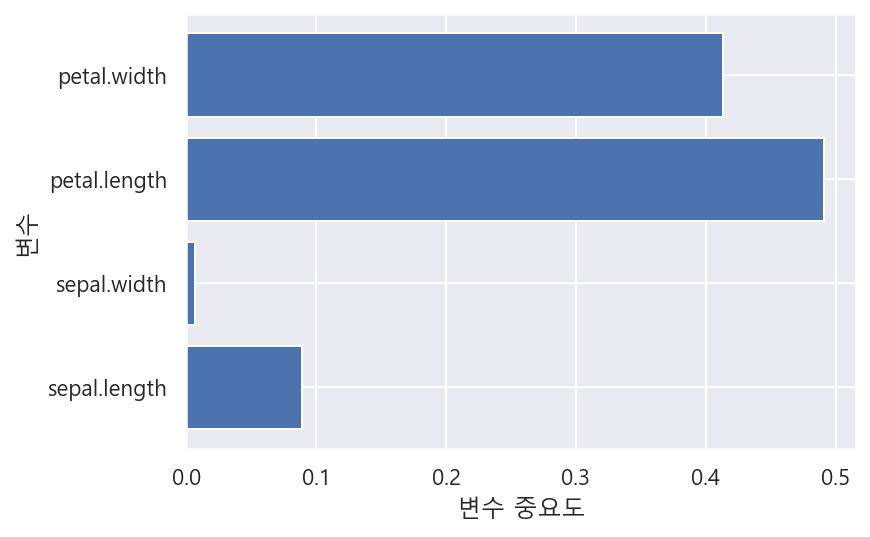

In [12]:
# 변수 중요도 시각화
def plot_feature_importances(model):
    n_features = X.columns
    plt.barh(n_features, model.feature_importances_, align='center')
    plt.yticks(n_features)
    plt.xlabel("변수 중요도")
    plt.ylabel("변수")

plot_feature_importances(rf)

# 회귀분석

In [13]:
# 필요한 라이브러리 부르기
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [14]:
# 라이브러리 불러오기
# 분석을 위한 임의 데이터로 내장 데이터 부름
from sklearn.datasets import load_boston

boston = load_boston()

In [15]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [16]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## 다중회귀분석

- 회귀분석의 경우 종속변수 ~ 독립변수로 예측값을 보는데 종속과 독립을 선택해서 넣을 수 있게 만들 수 있는가?
- 독립변수가 통계적으로 유의하지 않을 경우 제외하고 새로운 분석 모델을 만들어야하기 때문 -> 회귀분석 특징


- AIC를 최소로 만드는 변수선택법이 파이썬에 없어 이 부분을 솔루션에 담기위해선 R을 이용해야함
    - AIC를 최소로 만드는 변수선택법을 이용할 경우 분석에 꼭 사용해야하는 변수가 제거될 수 있으므로 파이썬에서 독립변수 선택으로 정해도 됨

In [17]:
# 상수항 추가
dfX_data = sm.add_constant(dfX, has_constant = "add")

In [18]:
dfX_data

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
dfy

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [20]:
# 모델 만들기
## OLS(종속변수,독립변수)
model = sm.OLS(dfy,dfX_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        13:51:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# 분석의 과정으로 이 부분을 어떤식으로 담을지 논의가 필요
# p-value가 커 변수 제거
dfX_data = dfX_data.drop(['INDUS','AGE'], axis=1)

In [22]:
# 모델 만들기
## OLS(종속변수,독립변수)
model = sm.OLS(dfy,dfX_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          5.54e-137
Time:                        13:51:53   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# 다중공선성 확인
# 상수항을 제하고 10 이상일 경우 제거가 필요함
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,const,579.255845
1,CRIM,1.789704
2,ZN,2.239229
3,CHAS,1.059819
4,NOX,3.778011
5,RM,1.834806
6,DIS,3.443420
7,RAD,6.861126
8,TAX,7.272386
9,PTRATIO,1.757681


In [24]:
# Coeffiecient Value
result.params

const      36.341145
CRIM       -0.108413
ZN          0.045845
CHAS        2.718716
NOX       -17.376023
RM          3.801579
DIS        -1.492711
RAD         0.299608
TAX        -0.011778
PTRATIO    -0.946525
B           0.009291
LSTAT      -0.522553
dtype: float64

## 회귀식 출력
    ### 회귀식 출력이 필요함
    
    회귀식 (종속변수 = coeffient*독립변수의 합 + 상수)
    - MEDV = 36.341145 - CRIM*0.108413 + ZN*0.045845 + ... - LSTAT*0.522553